In [1]:
import chaosmagpy as cp
import main_functions as mvs
import data_processing_tools as dpt
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [3]:
df = mvs.load_INTERMAGNET_files('VSS','2010-01-01','2015-12-31')

Reading files from VSS...


In [8]:
x,y,z = cp.coordinate_utils.cartesian_to_spherical(df['X'].values, df['Y'].values, df['Z'].values)

In [20]:
df_chaos = dpt.chaos_model_prediction('VSS','2010-01-01','2015-12-31')

Accessing http://www.spacecenter.dk/files/magnetic-models/RC/current/.
Successfully saved to C:\Users\marco\Downloads\Thesis_notebooks\SV_project\Data\chaos rc\newest_RC_file.h5.
Initiating geomagnetic field computation for VSS.
Computing core field.
Computing crustal field up to degree 110.
Computing field due to external sources, incl. induced field: GSM.


<AxesSubplot:xlabel='Date'>

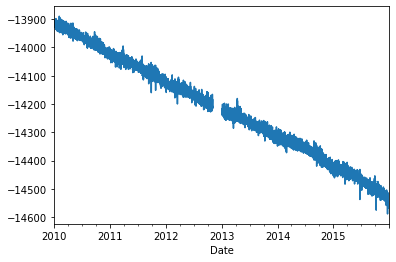

In [19]:
df['Z'].plot()

In [36]:
def plot_sv(station,
            starttime,
            endtime,
            files_path = None,
            df_station = None,
            apply_percentage: bool = False,
            plot_chaos: bool = False,
            chaos_correction: bool = False,
            save_plot: bool = False
            ):
    
    

    
    if df_station == None:
        
        df_station = mvs.load_INTERMAGNET_files(station,
                                                starttime,
                                                endtime,
                                                files_path)
        
    if chaos_correction == True:    
        
        df_station, df_chaos= dpt.external_field_correction_chaos_model(station,
                                                                        starttime,
                                                                        endtime,
                                                                        df_station,
                                                                        files_path = files_path,
                                                                        df_chaos=None
                                                                        )
    # calculating sv
    
    df_sv = dpt.calculate_SV(df_station, apply_percentage=apply_percentage)
        
    if plot_chaos == True:
        
        df_sv_chaos = dpt.calculate_SV(df_chaos, columns = ['X_int', 'Y_int', 'Z_int'])
        

    
    fig, axes = plt.subplots(3,1 ,figsize = (14,12))
    plt.suptitle(f'{station.upper()} Secular Variation', y = 0.91)
    plt.subplots_adjust(hspace=0.22)
    if plot_chaos == True:
        for ax, col, cols in zip(axes.flatten(), df_sv.columns, ['X_int','Y_int','Z_int']):
            ax.plot(df_sv_chaos[cols], color = 'red')
            ax.plot(df_sv[col], 'o', color = 'black')
        #if First_QD_data != []:
        #    SV_QD_first_data = datetime.strptime(First_QD_data, '%Y-%m-%d') + pd.DateOffset(months=-6)
        #    ax.plot(df_sv[col].loc[df_sv.index > SV_QD_first_data], 'o', color = 'green', label = 'QD-data')
            ax.set_ylabel(f'{df[col].name} SV (nT/Yr)')
        #if str(df_sv.index[-1]) >= '2021-09-30':
        #    ax.axvline(x = datetime.strptime('2022-03-30', '%Y-%m-%d') + pd.DateOffset(months=-6),
        #           color = 'blue', label = 'RC-index limit')
        
            ax.xaxis.set_major_locator(md.MonthLocator(interval=12)) 
            ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
            ax.xaxis.set_tick_params(labelrotation = 30, width=2)
            ax.xaxis.get_ticklocs(minor=True)
            ax.minorticks_on()
            ax.yaxis.set_tick_params(which='minor', bottom=False)
            ax.grid(alpha = 0.3)
        
            ax.set_xlim(df_sv[col].index[0], df_sv[col].index[-1])
            ax.set_xticks(list(df_sv_chaos.index[0:-1:12])[0:-1] + [df_sv.index[-1]])
            ax.legend()
    else:
        for ax, col in zip(axes.flatten(), df_sv.columns, ['X_int','Y_int','Z_int']):
            ax.plot(df_sv[col], 'o', color = 'black')
        #if First_QD_data != []:
        #    SV_QD_first_data = datetime.strptime(First_QD_data, '%Y-%m-%d') + pd.DateOffset(months=-6)
        #    ax.plot(df_sv[col].loc[df_sv.index > SV_QD_first_data], 'o', color = 'green', label = 'QD-data')
            ax.set_ylabel(f'{df[col].name} SV (nT/Yr)')
        #if str(df_sv.index[-1]) >= '2021-09-30':
        #    ax.axvline(x = datetime.strptime('2022-03-30', '%Y-%m-%d') + pd.DateOffset(months=-6),
        #           color = 'blue', label = 'RC-index limit')
        
            ax.xaxis.set_major_locator(md.MonthLocator(interval=12)) 
            ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
            ax.xaxis.set_tick_params(labelrotation = 30, width=2)
            ax.xaxis.get_ticklocs(minor=True)
            ax.minorticks_on()
            ax.yaxis.set_tick_params(which='minor', bottom=False)
            ax.grid(alpha = 0.3)
        
            ax.set_xlim(df_sv[col].index[0], df_sv[col].index[-1])
            ax.set_xticks(list(df_sv.index[0:-1:12])[0:-1] + [df_sv.index[-1]])
        ax.legend()
    #plt.savefig(f'GFZ_stay/{station}_sv_corrected.jpeg', dpi = 300, bbox_inches = 'tight')
    #plt.show()
        
        
        
        
        
        
        
        
        
        
        
        

In [2]:
plot_sv('VSS','2010-01-01','2020-12-31',df_station=None,plot_chaos=True,chaos_correction=True)

NameError: name 'plot_sv' is not defined